# NAMA : ERIS ALFIONITA
# NPM : 24083010032

Text(0.5, 1.0, 'quality of life (khusus sehat)')

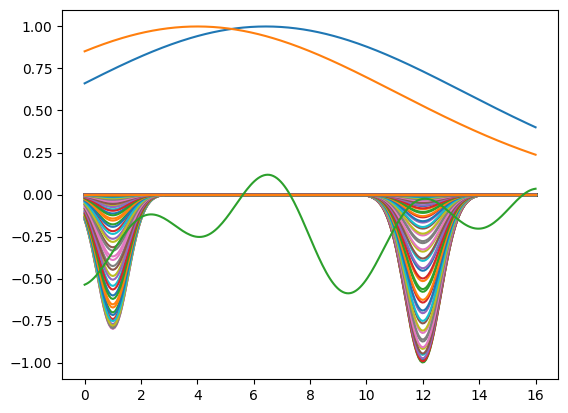

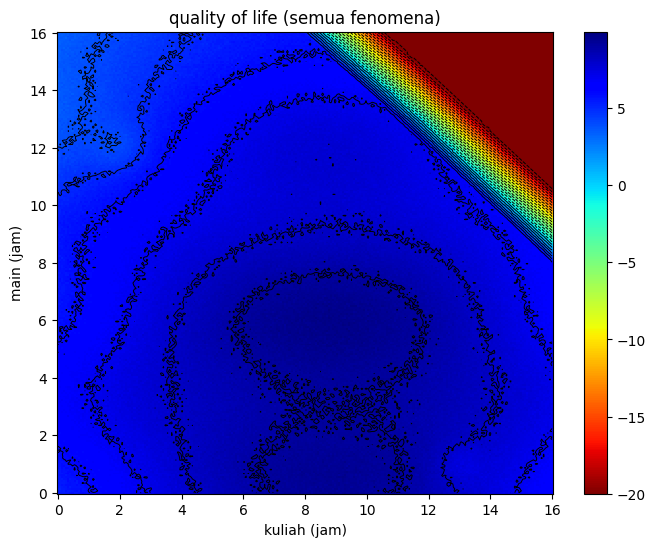

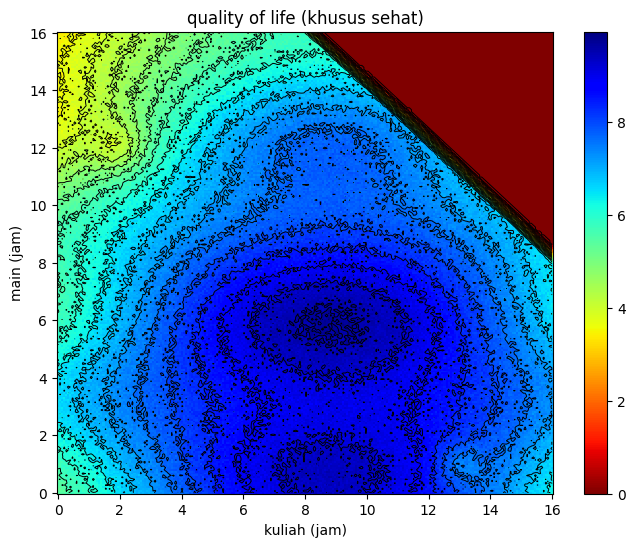

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

istirahat= 8 # istirahat yang cukup

# Grid setup
xmin, xmax, ymin, ymax = 0, 24-istirahat, 0, 24-istirahat
res = 240
x = np.linspace(xmin, xmax, res) # kuliah
y = np.linspace(ymin, ymax, res) # main
X, Y = np.meshgrid(x, y)

# kuliah
plt.plot(x, np.exp(-((x -((45.0/7)))**2) / (10**2))) # kuliah
kuliah_pref = np.exp(-((x -(9.0))**2) / (10**2))

# bermain, game, instagram, tiktok, dlsb
plt.plot(y, np.exp(-((y -4.0)**2) / (10**2))) # main
main_pref = np.exp(-((Y - 4.0)**2) / (10**2))

# kalau total siklus main-kerja lebih dari 24 jam, merusak ritme sirkadian
total_waktu = X + Y
total_penalty = 0.2 * np.exp(total_waktu / 24.0)  # stronger, narrower penalty
#plt.plot(x, -total_penalty)

# terlena
kebanyakan_main = 1 * np.exp(-((X - 2.0)**2 + (Y - 12.0)**2) / 0.8)   # kebanyakan main
plt.plot(x, -kebanyakan_main)
# burnout
kebanyakan_lembur = 0.8 * np.exp(-((X - 13.0)**2 + (Y - 1.0)**2) / 0.6)  # kebanyakan lembur
plt.plot(y, -kebanyakan_lembur )

# naik-turun motivasi harian
NPM = 32
np.random.seed(NPM)
plt.plot(x, 0.4 * np.sin((0.3 * x)-1) * np.cos(1.0 * y) -0.2)
ripple = 0.4 * np.sin((0.3 * X)-1) * np.cos(1.0 * Y) -0.2
noise = np.random.normal(loc=0.0, scale=0.1, size=X.shape)
ripple += noise

# objective function
# quality of life
# edit preferensi di sini, tiap orang bisa beda prioritas
Z = 10.0 * (0.6 * kuliah_pref + 0.4 * main_pref)
Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple

# clip tidak lebih dari 24 jam
Z -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)

# clip fenomena semua
Z_clip = np.clip(Z, -20, 20)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(X, Y, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (semua fenomena)")

# clip fenomena 'sehat'
Z_clip = np.clip(Z, 0, 10)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(X, Y, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (khusus sehat)")

# TUGAS
### 1) mainkan paramter-parameter (ambang batas jam, jam istirahat harian, pengali/pembagi eksponen)
### 1a) plot grafik-grafik secara berdampingan untuk membandingkan skalanya
### 2) tambahkan faktor-faktor ke objective function (jika perlu)
### 3) temukan titik optimum sesuai diri masing-masing,
###    temukan secara 'numerik', sebisa mungkin jangan pakai np.argmax
### 4) buat cerita aktivitas harian sesuai, bagaimana agar lebih baik/sehat


# PENYELESAIAN




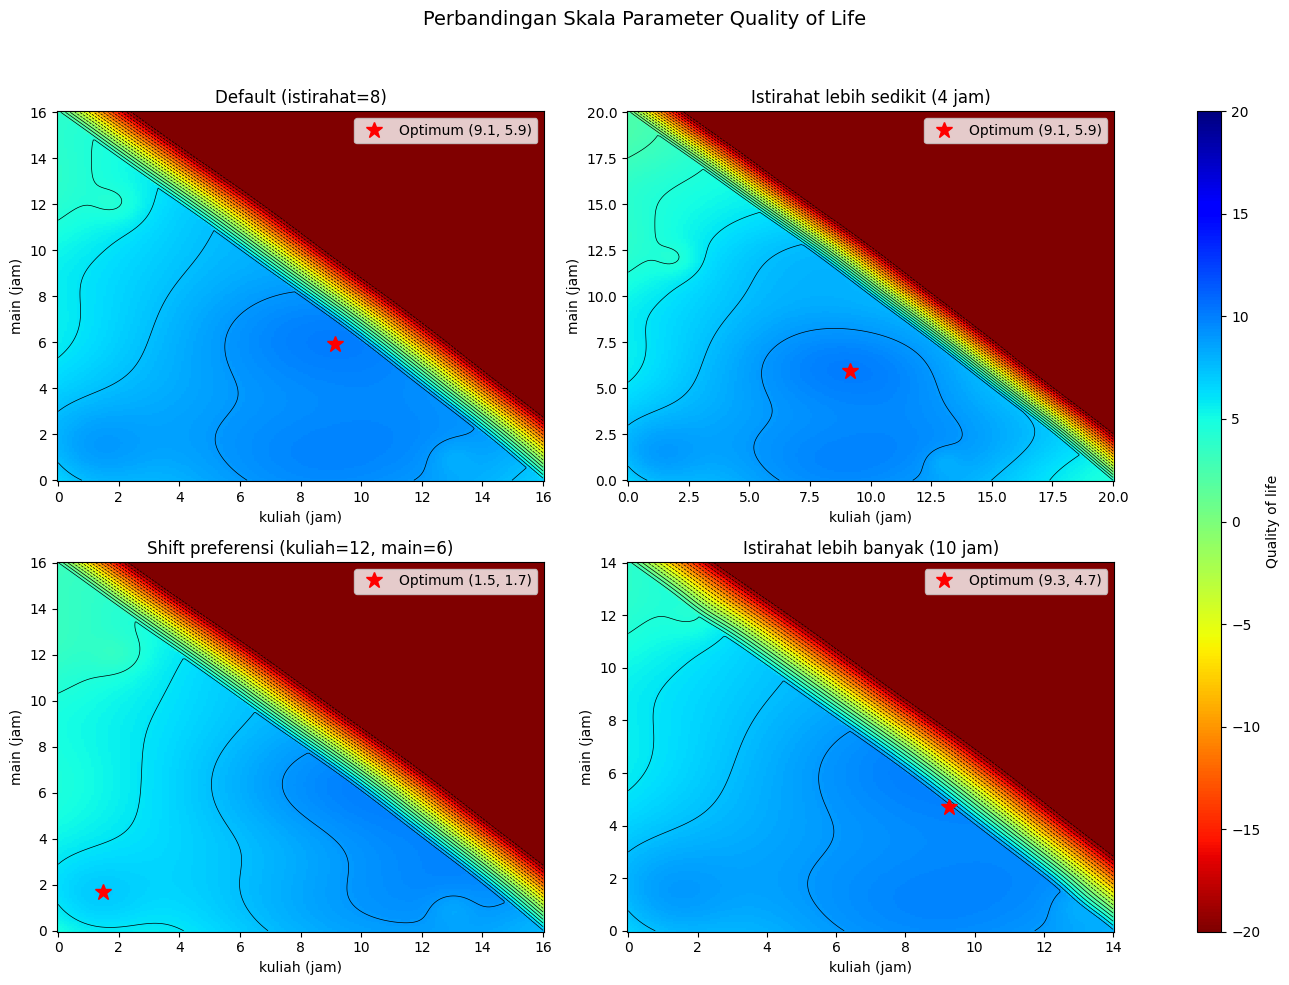

=== Titik optimum (default, istirahat 8 jam) ===
Jam kuliah optimal : 9.1 jam
Jam main optimal   : 5.9 jam
Quality of life    : 10.08

=== Narasi aktivitas harian sehat ===
- Tidur: 8 jam (misalnya 23.00 – 07.00)
- Kuliah/belajar: 9.1 jam (pagi – sore)
- Hiburan/main: 5.9 jam (sore/malam, game/scroll sosmed)
- Olahraga: ±1 jam (pagi/ sore)
- Aktivitas sosial: ±2 jam (ngobrol/komunitas)
- Sisanya untuk makan, ibadah, aktivitas pribadi lain.


In [ ]:
# -------------------------
# Fungsi Quality of Life
# -------------------------
def quality_of_life(X, Y, istirahat=8, kuliah_mu=9, main_mu=4):
    # preferensi kuliah
    kuliah_pref = np.exp(-((X - kuliah_mu)**2) / (10**2))
    # preferensi main
    main_pref   = np.exp(-((Y - main_mu)**2) / (10**2))

    # total waktu
    total_waktu   = X + Y
    total_penalty = 0.2 * np.exp(total_waktu / 24.0)

    # penalty spesifik
    kebanyakan_main   = 1 * np.exp(-((X - 2.0)**2 + (Y - 12.0)**2) / 0.8)
    kebanyakan_lembur = 0.8 * np.exp(-((X - 13.0)**2 + (Y - 1.0)**2) / 0.6)

    # faktor motivasi (ripple)
    ripple = 0.4 * np.sin((0.3 * X)-1) * np.cos(1.0 * Y) -0.2

    # faktor tambahan
    olahraga = np.exp(-((X - 1.0)**2 + (Y - 1.0)**2) / (2.0**2))  # 1-2 jam olahraga
    makan    = 0.3 * np.exp(-((X + Y - 16.0)**2) / (4.0**2))      # makan 3x/hari total ±16 jam aktif
    sosial   = 0.5 * np.exp(-((Y - 2.0)**2) / (2.0**2))           # butuh 2-3 jam interaksi

    # objective
    Z = 10.0 * (0.6 * kuliah_pref + 0.4 * main_pref)
    Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple
    Z += 2.0 * olahraga + 1.5 * makan + 1.0 * sosial

    # batas 24 jam
    Z -= 10.0 * np.maximum(total_waktu - (24 - istirahat), 0.0)

    return np.clip(Z, -20, 20)

# -------------------------
# Grid setup
# -------------------------
def make_grid(istirahat=8, res=200):
    xmax, ymax = 24 - istirahat, 24 - istirahat
    x = np.linspace(0, xmax, res)
    y = np.linspace(0, ymax, res)
    return np.meshgrid(x, y)

# -------------------------
# Cari optimum numerik
# -------------------------
def find_optimum(istirahat=8, kuliah_mu=9, main_mu=4):
    def neg_obj(p):
        return -quality_of_life(p[0], p[1], istirahat, kuliah_mu, main_mu)
    res = minimize(neg_obj, x0=[kuliah_mu, main_mu],
                   bounds=[(0, 24-istirahat), (0, 24-istirahat)])
    return res.x, -res.fun

# -------------------------
# Simulasi beberapa skenario
# -------------------------
def simulate_and_plot():
    scenarios = [
        {"title": "Default (istirahat=8)", "istirahat": 8, "kuliah_mu": 9, "main_mu": 4},
        {"title": "Istirahat lebih sedikit (4 jam)", "istirahat": 4, "kuliah_mu": 9, "main_mu": 4},
        {"title": "Shift preferensi (kuliah=12, main=6)", "istirahat": 8, "kuliah_mu": 12, "main_mu": 6},
        {"title": "Istirahat lebih banyak (10 jam)", "istirahat": 10, "kuliah_mu": 9, "main_mu": 4},
    ]

    fig = plt.figure(figsize=(13, 10))
    gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05])
    fig.suptitle("Perbandingan Skala Parameter Quality of Life", fontsize=14)

    axs = [
        fig.add_subplot(gs[0,0]),
        fig.add_subplot(gs[0,1]),
        fig.add_subplot(gs[1,0]),
        fig.add_subplot(gs[1,1]),
    ]
    cax = fig.add_subplot(gs[:,2])

    for ax, sc in zip(axs, scenarios):
        X, Y = make_grid(sc["istirahat"])
        Z = quality_of_life(X, Y, sc["istirahat"], sc["kuliah_mu"], sc["main_mu"])

        pcm = ax.pcolormesh(X, Y, Z, cmap='jet_r', shading='auto', vmin=-20, vmax=20)
        ax.contour(X, Y, Z, levels=20, colors='black', linewidths=0.5)
        ax.set_title(sc["title"])
        ax.set_xlabel("kuliah (jam)")
        ax.set_ylabel("main (jam)")

        # optimum
        (opt_x, opt_y), opt_val = find_optimum(sc["istirahat"], sc["kuliah_mu"], sc["main_mu"])
        ax.plot(opt_x, opt_y, "r*", markersize=12, label=f"Optimum ({opt_x:.1f}, {opt_y:.1f})")
        ax.legend(loc="upper right")

    fig.colorbar(pcm, cax=cax, label="Quality of life")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

simulate_and_plot()

# -------------------------
# Narasi aktivitas harian
# -------------------------
(opt_x, opt_y), opt_val = find_optimum(istirahat=8, kuliah_mu=9, main_mu=4)

print("=== Titik optimum (default, istirahat 8 jam) ===")
print(f"Jam kuliah optimal : {opt_x:.1f} jam")
print(f"Jam main optimal   : {opt_y:.1f} jam")
print(f"Quality of life    : {opt_val:.2f}")

# Narasi sederhana
print("\n=== Narasi aktivitas harian sehat ===")
print(f"- Tidur: 8 jam (misalnya 23.00 – 07.00)")
print(f"- Kuliah/belajar: {opt_x:.1f} jam (pagi – sore)")
print(f"- Hiburan/main: {opt_y:.1f} jam (sore/malam, game/scroll sosmed)")
print(f"- Olahraga: ±1 jam (pagi/ sore)")
print(f"- Aktivitas sosial: ±2 jam (ngobrol/komunitas)")
print("- Sisanya untuk makan, ibadah, aktivitas pribadi lain.")

**Default (istirahat = 8 jam)**

Optimum: kuliah ±9,1 jam, main ±5,9 jam.
Ini baseline yang cukup seimbang: porsi belajar produktif, tapi hiburan juga tidak diabaikan.
> kualitas hidup paling baik tercapai dengan kombinasi aktivitas yang relatif seimbang antara kuliah dan relaksasi (main).


**Istirahat lebih sedikit (4 jam)**

Optimum: tetap ±9,1 jam kuliah dan ±5,9 jam main, sama seperti default.
Namun, karena waktu istirahat dipotong banyak, total jam aktif bertambah, sehingga sebenarnya tubuh lebih cepat kelelahan.
> secara matematis optimum tidak bergeser, tapi dalam kehidupan nyata, kualitas hidup akan menurun drastis karena kurang tidur. Jadi grafik ini menunjukkan model stabil, tapi realitas biologis tidak mendukung.

**Shift preferensi (kuliah = 12, main = 6)**

Optimum: turun drastis ke kuliah ±1,5 jam dan main ±1,7 jam.
Interpretasi: ketika preferensi “dipaksa” (misalnya terlalu banyak target kuliah dan main), model justru menemukan bahwa optimum dicapai dengan mengurangi hampir semua aktivitas.
Artinya, sistem mendeteksi beban yang tidak realistis, sehingga cara bertahan hidup optimal adalah meminimalisir kegiatan. Ini tanda bahwa preferensi awal tidak sehat.


**Istirahat lebih banyak (10 jam)**

Optimum: kuliah ±9,3 jam, main ±4,7 jam.
Dengan tidur lebih lama, jam hiburan optimal sedikit berkurang dibanding default.
> tambahan tidur memangkas waktu main, tetapi jam kuliah tetap terjaga, sehingga produktivitas tidak terpengaruh besar. Kualitas hidup tetap tinggi karena tubuh lebih segar.